<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/sklearn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

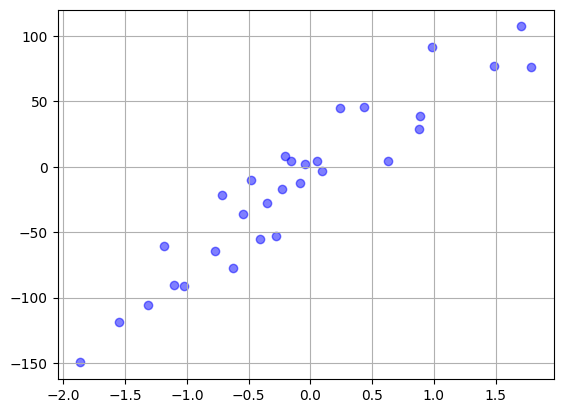

In [26]:
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_regression(
    random_state = 3,
    n_features = 1,
    noise = 20,
    n_samples = 30
)

df = pd.DataFrame(X)
plt.scatter(df[0], y, color = 'b', alpha = 0.5)
plt.grid()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('정답률 :', score*100, '%')

정답률 : 84.98344774428922 %


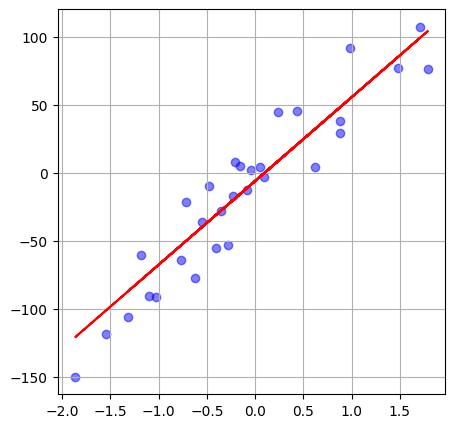

In [30]:
plt.figure(figsize = (5,5))
plt.scatter (X, y, color = 'b', alpha = 0.5)
plt.plot(X, model.predict(X), color = 'r')
plt.grid()
plt.show()

정답률 : 33.025689869605145 %


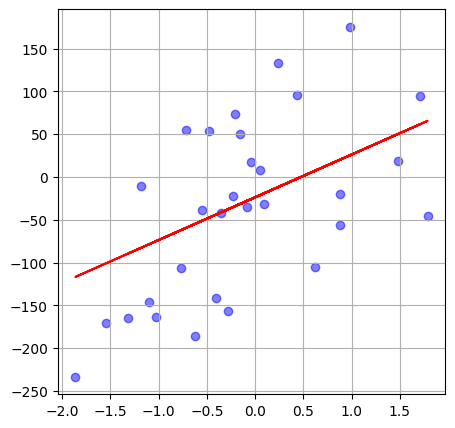

In [31]:
X, y = make_regression(
    random_state = 3,
    n_features = 1,
    noise = 80,
    n_samples = 30
)

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('정답률 :', score*100, '%')

plt.figure(figsize = (5,5))
plt.scatter (X, y, color = 'b', alpha = 0.5)
plt.plot(X, model.predict(X), color = 'r')
plt.grid()
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 산포도에 분류 상태를 그리는 함수
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 점과 색칠 컬러맵
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # 모델이 있으면 표시 범위의 점을 모두 예측해서 색을 칠한다
    if model:
        # 표시 범위를 조금 넓혀 분할하고, 조사하는 점(200x200)을 준비한다
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 모든 점의 값을 모델로 예측한다
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　예측결괏값(0~2)의 색(cmap_fills)으로 칠한다
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　경계를 회색으로 칠한다
        plt.contour(XX, YY, pred, colors="gray")
    #　target의 값(0~2)의 색(cmap_dots)으로 점을 그린다
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 2,
    cluster_std = 1,
    n_samples = 300
)

df = pd.DataFrame(X)
print(df.head())
print(y)

          0         1
0  3.359415  5.248267
1  2.931100  0.782556
2  1.120314  5.758061
3  2.876853  0.902956
4  1.666088  5.605634
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0]


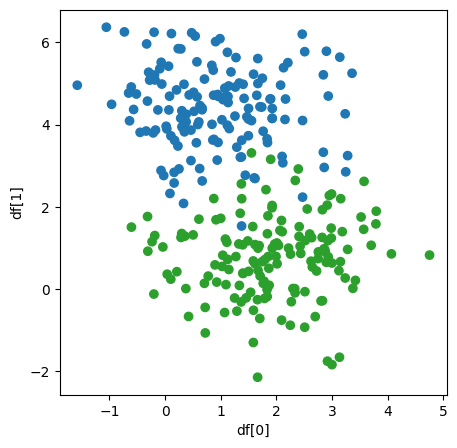

In [35]:
plot_boundary(None, df[0], df[1], y, 'df[0]', 'df[1]')

정답률 : 96.0 %


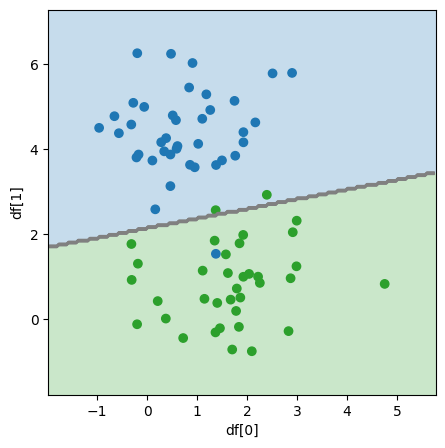

In [37]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

정답률 : 82.66666666666667 %


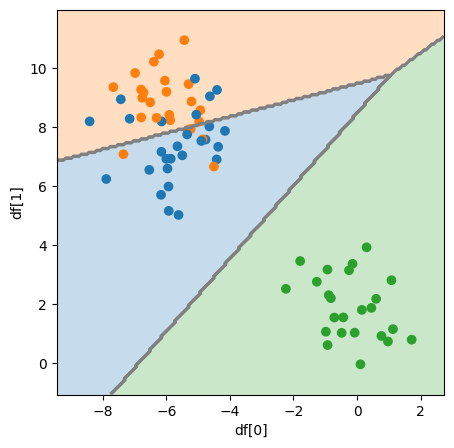

In [38]:
X, y = make_blobs(
    random_state = 5,
    n_features = 2,
    centers = 3,
    cluster_std = 1,
    n_samples = 300
)

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

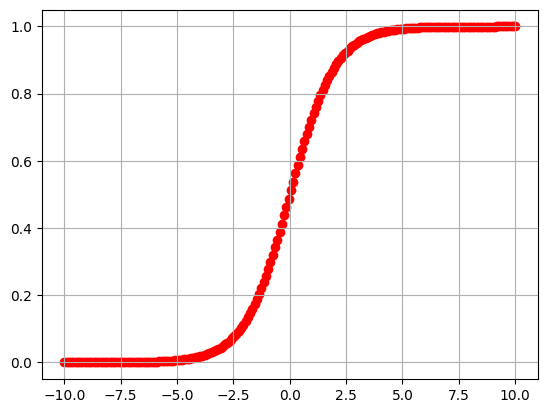

In [39]:
xx = np.linspace(-10, 10, 200)
yy = 1 / (1+np.exp(-xx))

plt.scatter(xx, yy, color = 'r')
plt.grid()
plt.show()